Loading the Dataset

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [3]:
# metadata 
print(adult.metadata) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
# variable information 
print(adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [5]:
df = pd.concat([X, y], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.to_csv("Data\dataset.csv")

Cleaning the Dataset

In [7]:
df = pd.read_csv("Data\dataset.csv")

In [8]:
# Get the number of rows in the entire dataset
num_rows = df.shape[0]

# Print the number of rows
print("Number of rows in the entire dataset:", num_rows)


Number of rows in the entire dataset: 48842


In [9]:
df.describe()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,24420.500000,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,14099.615261,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,12210.250000,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,24420.500000,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,36630.750000,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Check unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)

Unique values for column 'Unnamed: 0':
[    0     1     2 ... 48839 48840 48841]
Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
Unique values for column 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
Unique values for column 'fnlwgt':
[ 77516  83311 215646 ... 173449  89686 350977]
Unique values for column 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values for column 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'


Check for "?"

In [11]:
# Count the number of rows containing "?" values
rows_with_question_mark = df.apply(lambda x: x.astype(str).str.contains('\?').any(), axis=1).sum()

# Print the number of rows containing "?" values
print("Number of rows containing '?' values:", rows_with_question_mark)


Number of rows containing '?' values: 2399


In [12]:
# Count the number of rows containing "?" values for each column
question_mark_counts_per_column = df.apply(lambda x: x.astype(str).str.contains('\?').sum())

# Print the number of rows containing "?" values for each column
print("Number of rows containing '?' values for each column:")
print(question_mark_counts_per_column)


Number of rows containing '?' values for each column:
Unnamed: 0           0
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


We are replacing the "?" values with Mode.

In [13]:
# Impute missing values with mode for categorical columns
for column in ['workclass', 'occupation', 'native-country']:
    mode_value = df[column].mode()[0]  # Calculate mode
    df[column].replace('?', mode_value, inplace=True)  # Replace '?' with mode

# Verify that missing values have been imputed
question_mark_counts_per_column = df.apply(lambda x: x.astype(str).str.contains('\?').sum())
print("Number of rows containing '?' values for each column after imputation:")
print(question_mark_counts_per_column)


C:\Users\chanu\AppData\Local\Temp\ipykernel_23928\3476587457.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace('?', mode_value, inplace=True)  # Replace '?' with mode


Number of rows containing '?' values for each column after imputation:
Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Check for null values

In [14]:
# Count the number of rows containing null values
rows_with_null_values = df.isnull().any(axis=1).sum()

# Print the number of rows containing null values
print("Number of rows containing null values:", rows_with_null_values)


Number of rows containing null values: 1221


In [15]:
# Count the number of null values for each column
null_values_per_column = df.isnull().sum()

# Print the number of null values for each column
print("Number of null values for each column:")
print(null_values_per_column)

Number of null values for each column:
Unnamed: 0          0
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


Dropping the null values

In [16]:
# Drop rows with null values
df.dropna(inplace=True)

# Verify that null values have been dropped
null_values_per_column = df.isnull().sum()
print("Number of null values for each column after dropping rows with null values:")
print(null_values_per_column)


Number of null values for each column after dropping rows with null values:
Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [17]:
# Check if any column contains "?" values
contains_question_mark = df.apply(lambda x: x.astype(str).str.contains('\?').any())

# Print columns containing "?" values
print("Columns containing '?' values:")
print(contains_question_mark[contains_question_mark].index)

# Check for columns containing null values
contains_null = df.isnull().any()

# Print columns containing null values
print("Columns containing null values:")
print(contains_null[contains_null].index)

Columns containing '?' values:
Index([], dtype='object')
Columns containing null values:
Index([], dtype='object')


In [18]:
# Reset the index
df.reset_index(drop=True, inplace=True)

In [19]:
print(df)

       Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0               0   39         State-gov   77516  Bachelors             13   
1               1   50  Self-emp-not-inc   83311  Bachelors             13   
2               2   38           Private  215646    HS-grad              9   
3               3   53           Private  234721       11th              7   
4               4   28           Private  338409  Bachelors             13   
...           ...  ...               ...     ...        ...            ...   
47616       48836   33           Private  245211  Bachelors             13   
47617       48837   39           Private  215419  Bachelors             13   
47618       48839   38           Private  374983  Bachelors             13   
47619       48840   44           Private   83891  Bachelors             13   
47620       48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation   relationship  \


In [20]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the result
if num_duplicates > 0:
    print("There are duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")


There are no duplicate rows in the DataFrame.


In [21]:
df = df.drop_duplicates()#drop duplicate rows

In [22]:
print(df)

       Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0               0   39         State-gov   77516  Bachelors             13   
1               1   50  Self-emp-not-inc   83311  Bachelors             13   
2               2   38           Private  215646    HS-grad              9   
3               3   53           Private  234721       11th              7   
4               4   28           Private  338409  Bachelors             13   
...           ...  ...               ...     ...        ...            ...   
47616       48836   33           Private  245211  Bachelors             13   
47617       48837   39           Private  215419  Bachelors             13   
47618       48839   38           Private  374983  Bachelors             13   
47619       48840   44           Private   83891  Bachelors             13   
47620       48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation   relationship  \


In [23]:
# Remove duplicate columns
df_T = df.T.drop_duplicates().T

In [24]:
# If needed, you can also reset the index after removing rows or columns
df = df.reset_index(drop=True)

Fix Income Column

In [25]:
df['income'].value_counts()

income
<=50K     24720
<=50K.    11360
>50K       7841
>50K.      3700
Name: count, dtype: int64

In [26]:
# Replace "." with an empty string in the "income" column
df['income'] = df['income'].str.replace('.', '')

# Count the values in the "income" column after removing "."
print(df['income'].value_counts())


income
<=50K    36080
>50K     11541
Name: count, dtype: int64


In [27]:
# Remove the "Unnamed" column
df.drop(columns="Unnamed: 0", inplace=True)

In [28]:
print(df)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
47616   33           Private  245211  Bachelors             13   
47617   39           Private  215419  Bachelors             13   
47618   38           Private  374983  Bachelors             13   
47619   44           Private   83891  Bachelors             13   
47620   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation   relationship  \
0           Never-married       Adm-clerical  Not-in-family   
1      Married-civ-spouse    Exec-managerial        Husband   
2                D

C:\Users\chanu\AppData\Local\Temp\ipykernel_23928\4013280011.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(y=max(education_counts.get(category, 0), education_num_counts.get(category, 0)), linestyle='--', alpha=0.5)


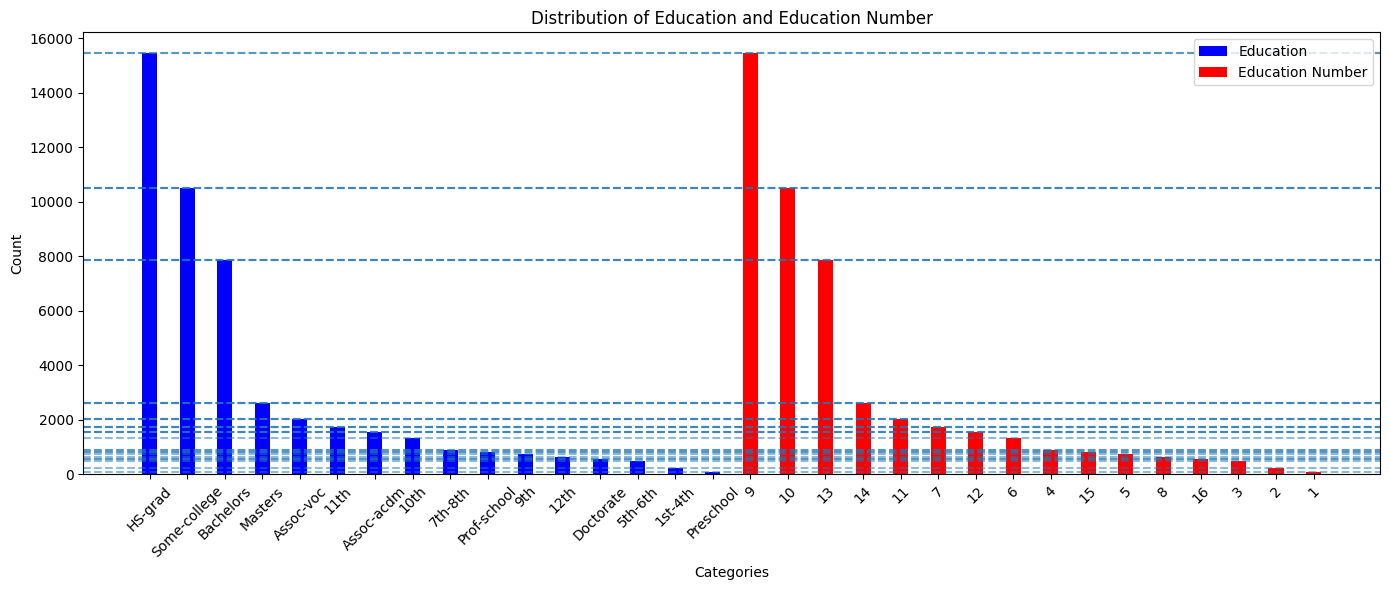

In [29]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in the 'education' and 'education-num' features
education_counts = df['education'].value_counts()
education_num_counts = df['education-num'].value_counts()

# Plot bar plots for 'education' and 'education-num' on the same figure
plt.figure(figsize=(14, 6))

plt.bar(education_counts.index.astype(str), education_counts, width=0.4, color='b', label='Education')
plt.bar(education_num_counts.index.astype(str), education_num_counts, width=0.4, color='r', label='Education Number')

# Add horizontal lines for each category
for category in education_counts.index.union(education_num_counts.index):
    plt.axhline(y=max(education_counts.get(category, 0), education_num_counts.get(category, 0)), linestyle='--', alpha=0.5)

plt.title('Distribution of Education and Education Number')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Dropping "education-number" beacuse it's the same as "education" column and its hard to understand compared to education column

In [30]:
# Remove the "education number" column
df.drop(columns="education-num", inplace=True)

In [31]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
df.to_csv("Data\cleaned_dataset.csv")

Data Visualization

In [51]:
df=pd.read_csv("Data\cleaned_dataset.csv")
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
# Remove the "Unnamed" column
df.drop(columns="Unnamed: 0", inplace=True)
df.head()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


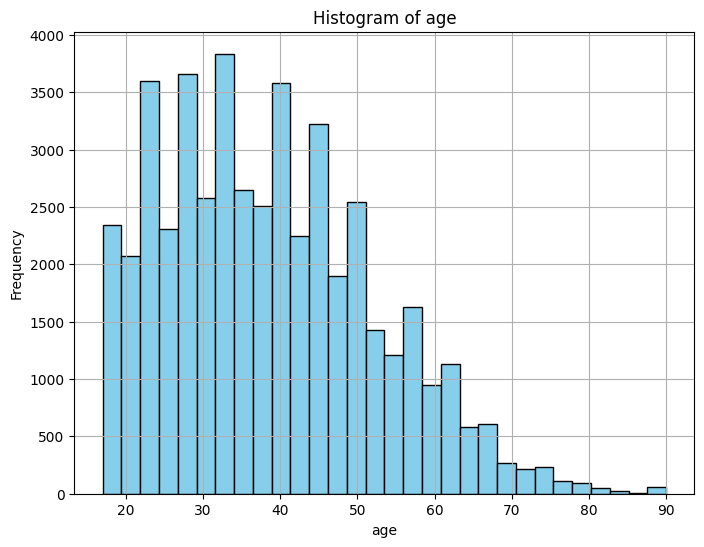

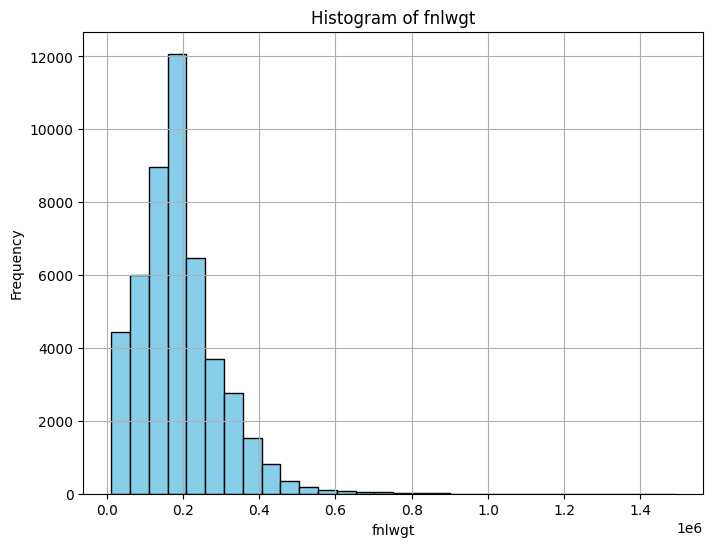

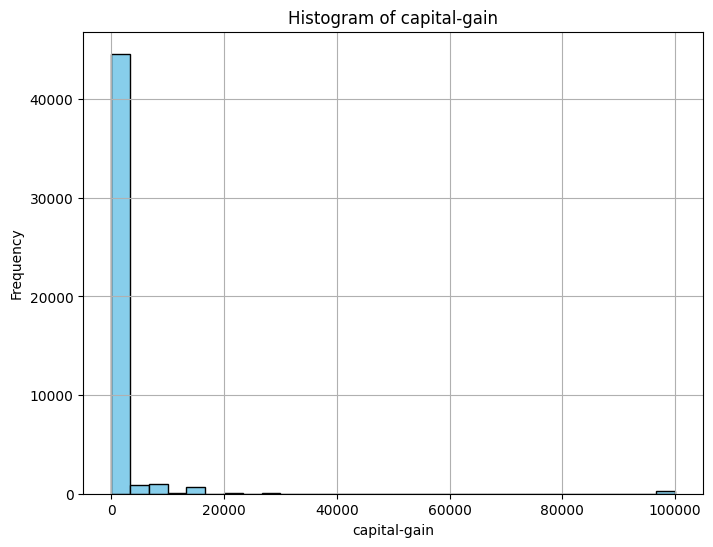

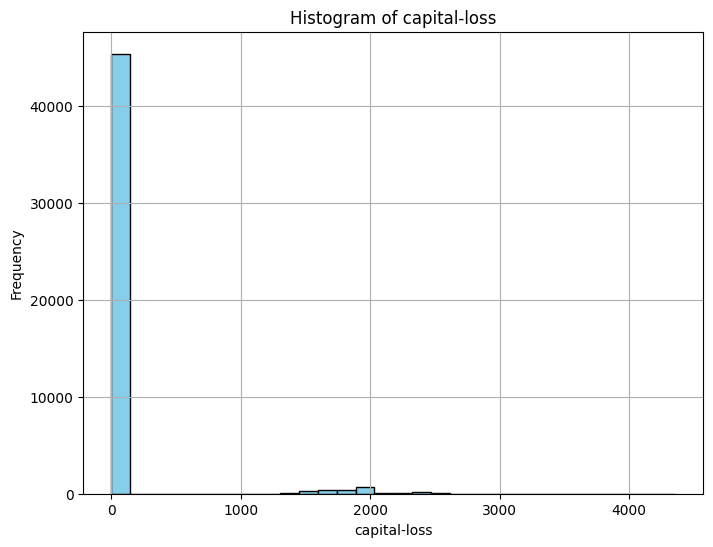

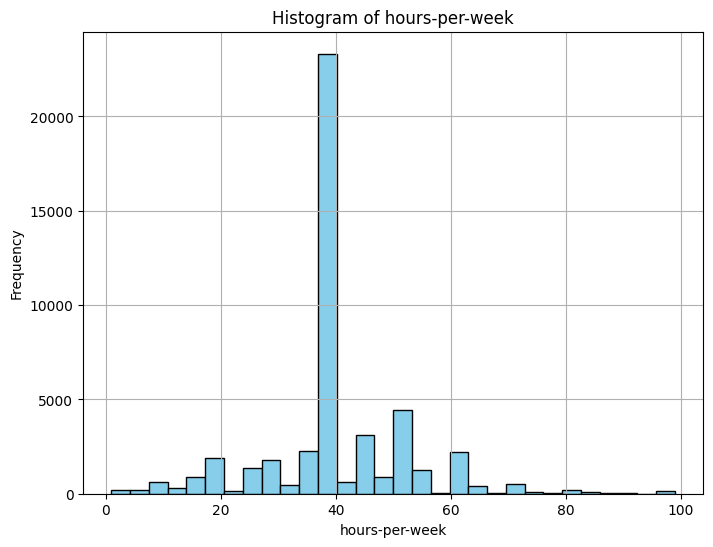

In [53]:
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

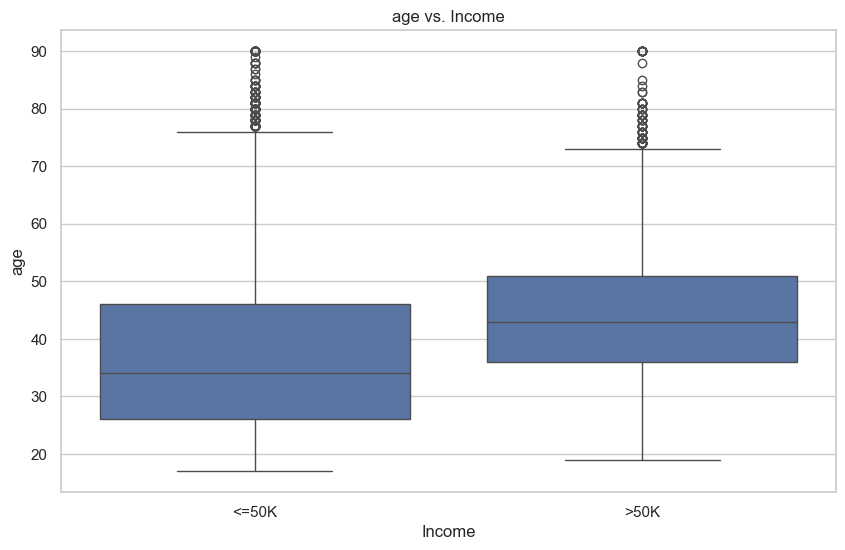

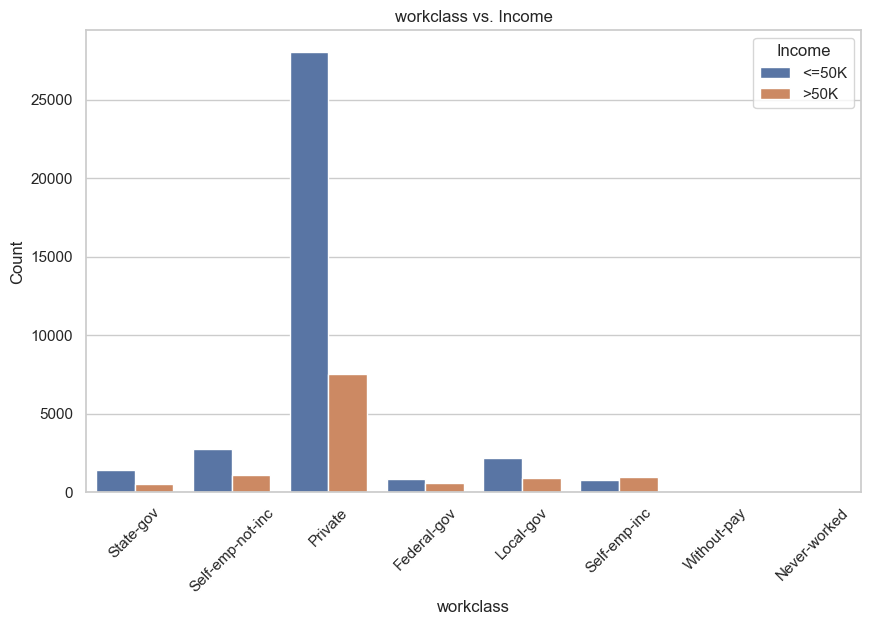

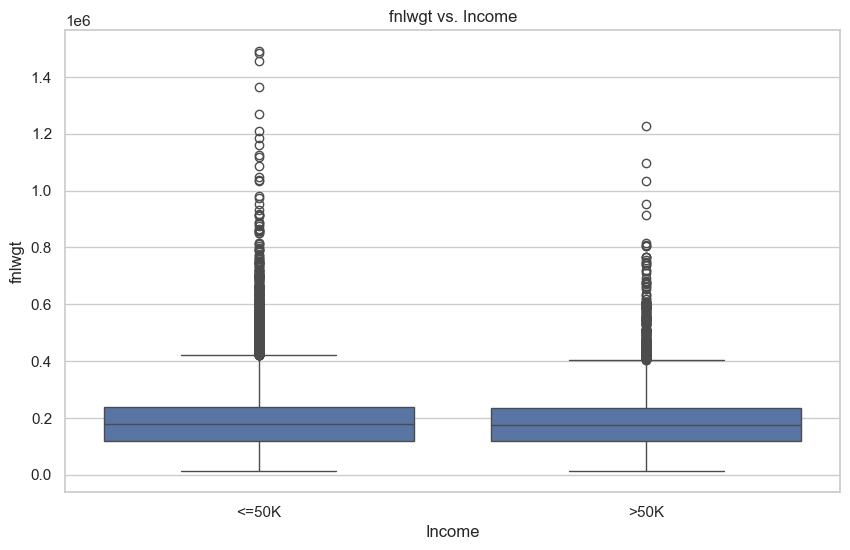

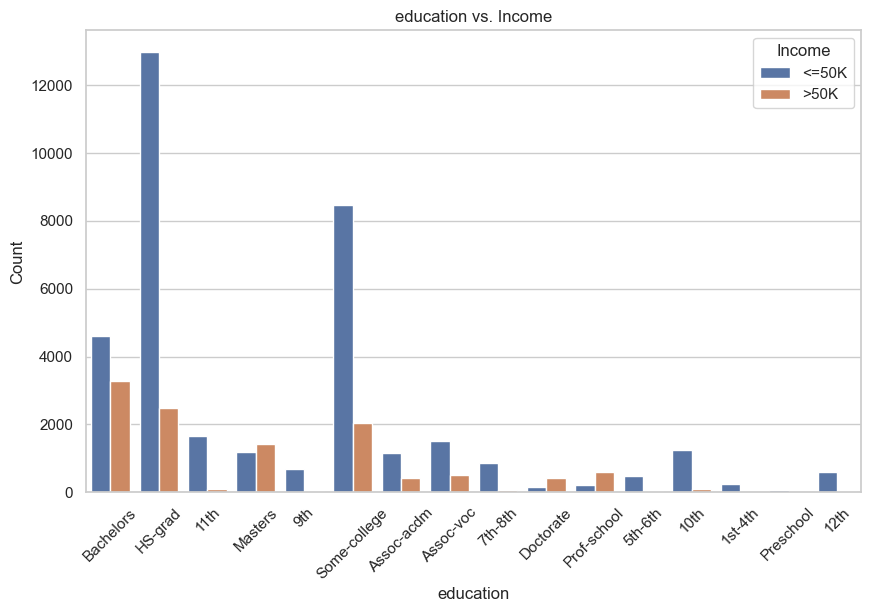

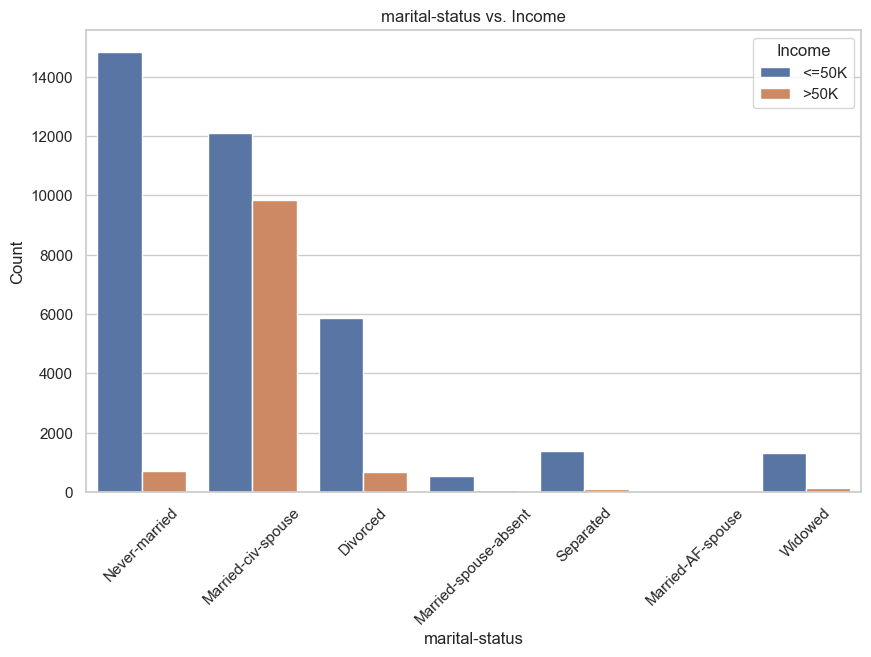

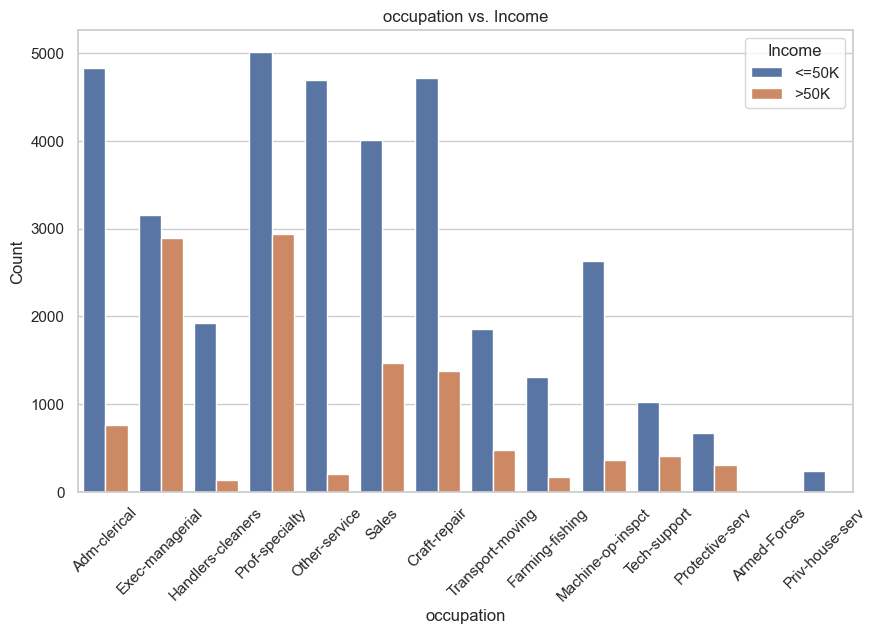

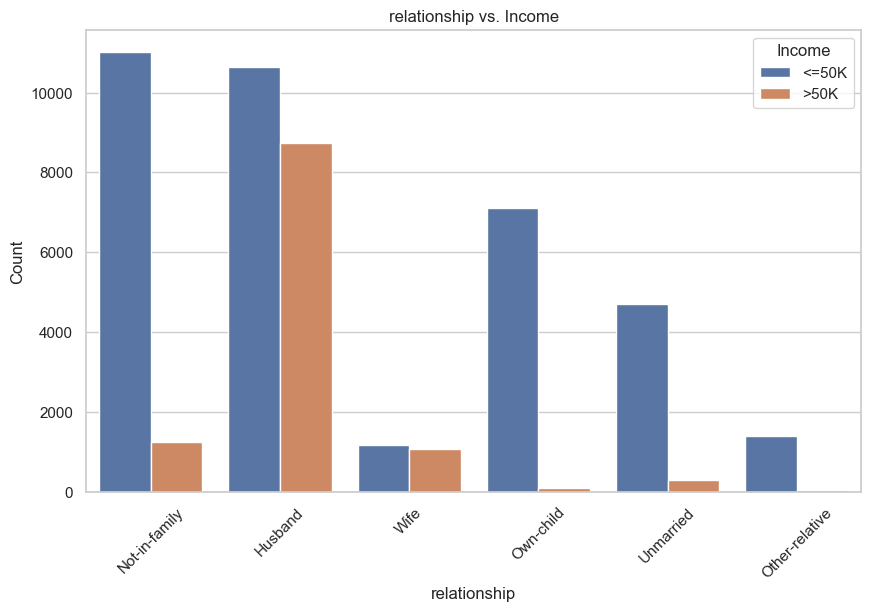

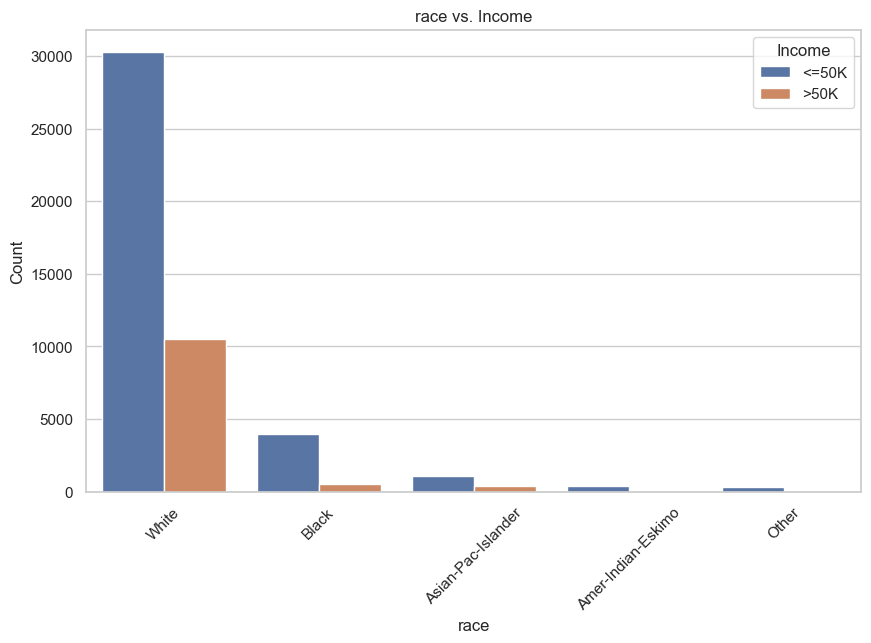

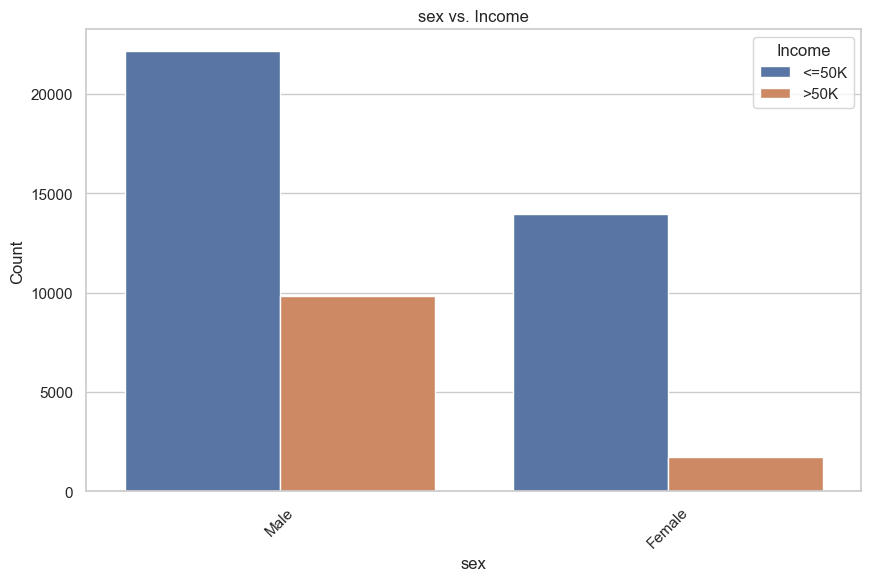

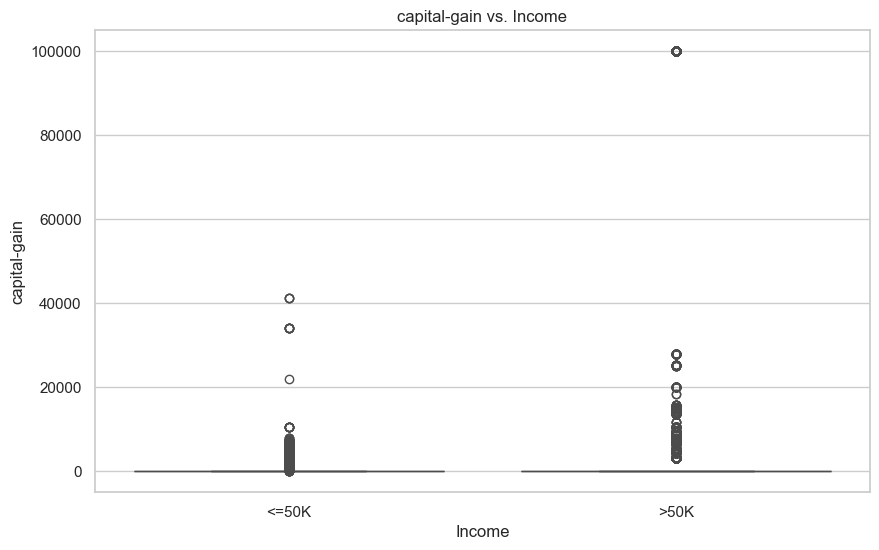

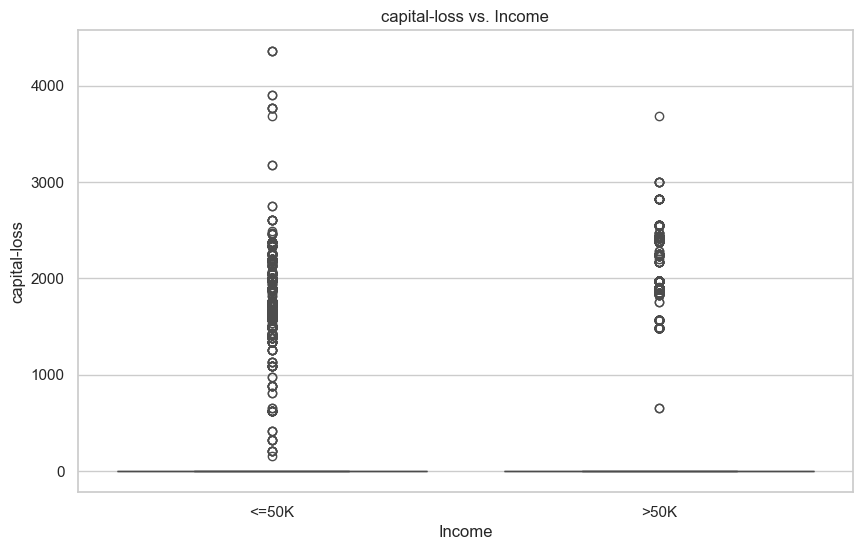

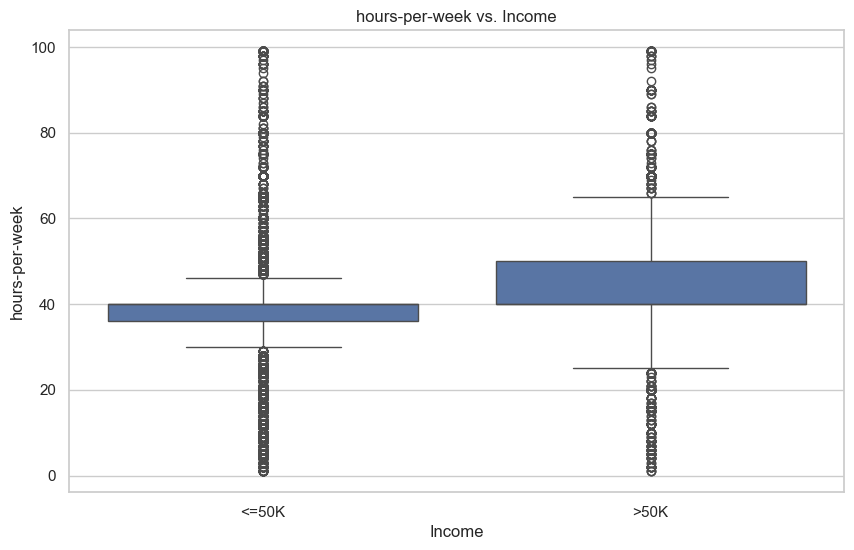

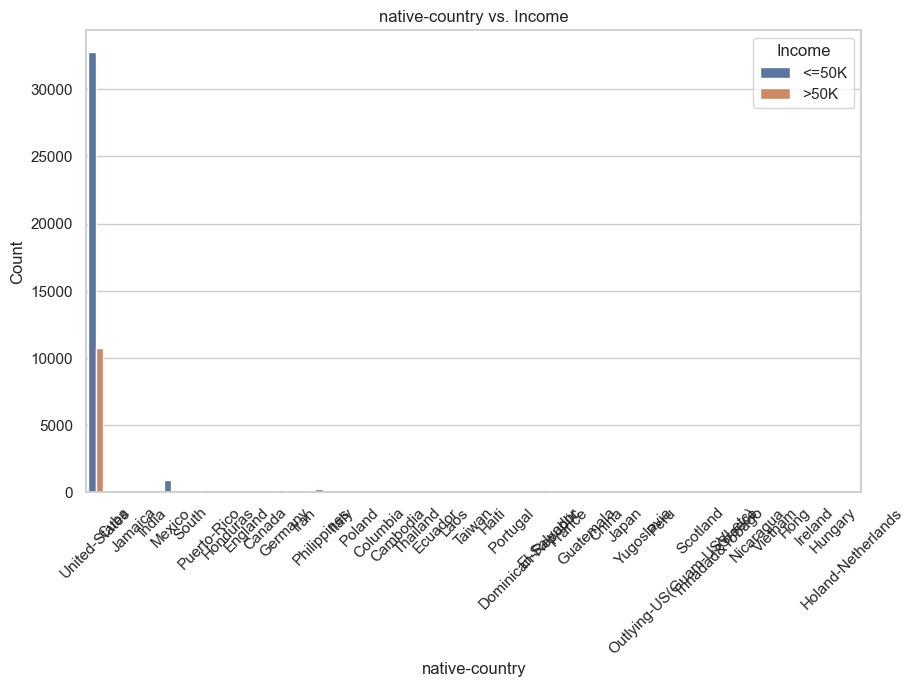

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


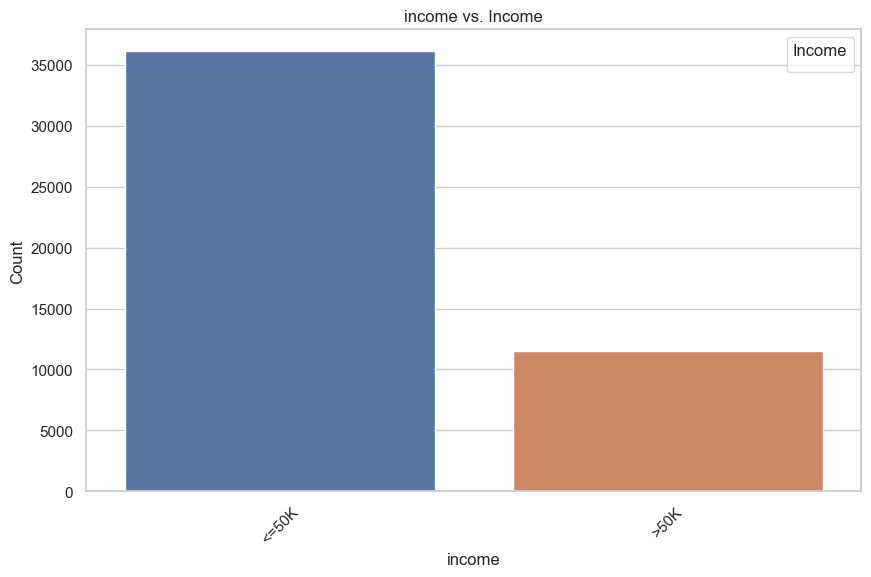

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Iterate through all columns in the dataset
for col in df.columns:
    # Check if the column is numerical
    if df[col].dtype in ['int64', 'float64']:  
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='income', y=col, data=df)
        plt.title(f'{col} vs. Income')
        plt.xlabel('Income')
        plt.ylabel(col)
        plt.show()
    else:
        # Create count plot for categorical columns
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='income', data=df)
        plt.title(f'{col} vs. Income')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Income', loc='upper right')
        plt.show()


Handeling Outliers

In [33]:
df=pd.read_csv("Data\cleaned_dataset.csv")
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
# Remove the "Unnamed" column
df.drop(columns="Unnamed: 0", inplace=True)
df.head()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
print("Number of rows in the dataset:", len(df))
df.describe()

Number of rows in the dataset: 47621


,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000
mean,38.640684,1.897271e+05,1091.137649,87.853489,40.600050
std,13.558961,1.055695e+05,7487.228336,404.010612,12.260345
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175840e+05,0.000000,0.000000,40.000000
50%,37.000000,1.782820e+05,0.000000,0.000000,40.000000
75%,48.000000,2.377200e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


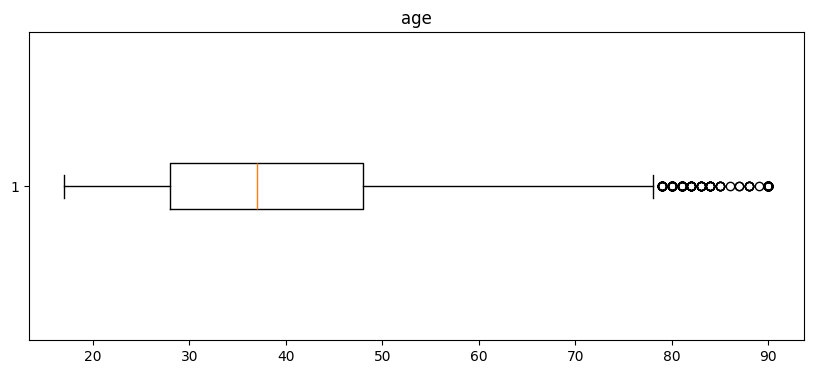

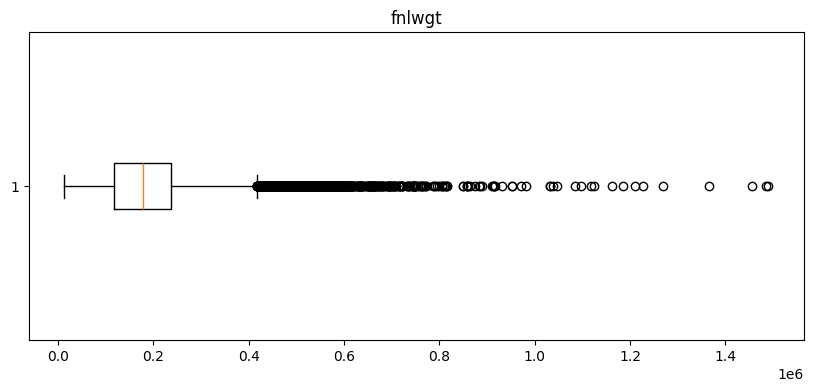

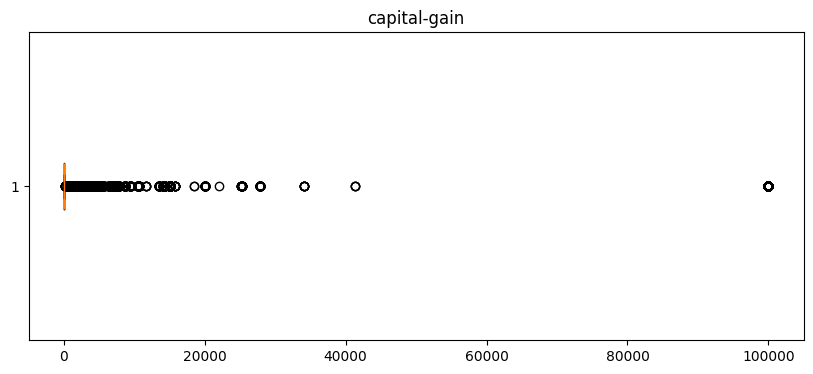

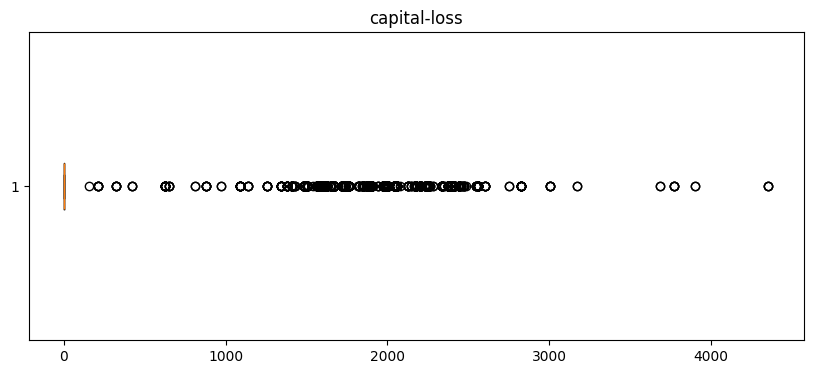

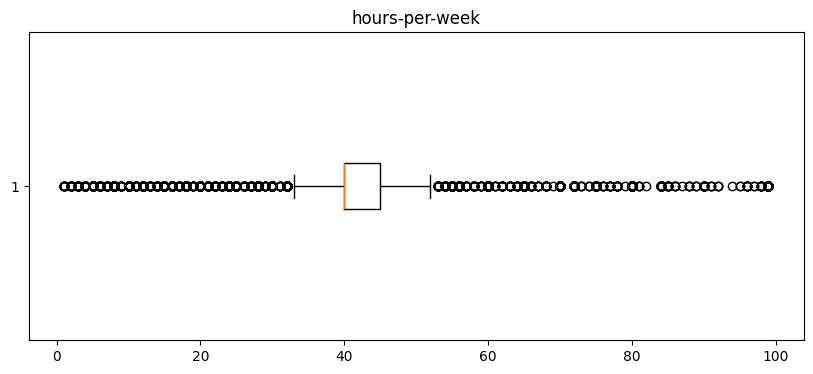

In [36]:
import matplotlib.pyplot as plt

# Select numerical value columns
num_columns = df.select_dtypes(include=['int64']).columns.tolist()

# Create box plots for each numerical column
for col in num_columns:
    plt.figure(figsize=(10, 4))
    plt.boxplot(df[col], vert=False)
    plt.title(col)
    plt.show()


In [37]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


In [38]:
# Iterate over numerical columns to detect outliers using IQR method
for col in num_columns:
    outliers = detect_outliers_iqr(df, col)
    
    # Print information about outliers
    print(f"Column: {col}")
    print(f"Number of outliers detected: {len(outliers)}")
    print(outliers)
    print("\n")

Column: age
Number of outliers detected: 200
       age         workclass  fnlwgt     education         marital-status  \
74      79           Private  124744  Some-college     Married-civ-spouse   
222     90           Private   51744       HS-grad          Never-married   
430     80           Private  107762       HS-grad                Widowed   
918     81  Self-emp-not-inc  136063       HS-grad     Married-civ-spouse   
1040    90           Private  137018       HS-grad          Never-married   
...    ...               ...     ...           ...                    ...   
47292   84           Private   65478       HS-grad                Widowed   
47320   80           Private  107740       HS-grad                Widowed   
47356   80  Self-emp-not-inc   29441       7th-8th  Married-spouse-absent   
47453   83           Private  192305  Some-college               Divorced   
47493   79         Local-gov  132668       HS-grad     Married-civ-spouse   

              occupation    re

Fix Outliers

In [39]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Define the threshold values (e.g., 5th and 95th percentiles)
lower_threshold = df[num_columns].quantile(0.05)
upper_threshold = df[num_columns].quantile(0.95)

# Create a copy of the DataFrame
df_winsorized = df.copy()

# Winsorize the data
for col in num_columns:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=(0.05, 0.05))

df_winsorized[num_columns] = df_winsorized[num_columns].clip(lower=lower_threshold, upper=upper_threshold, axis=1)

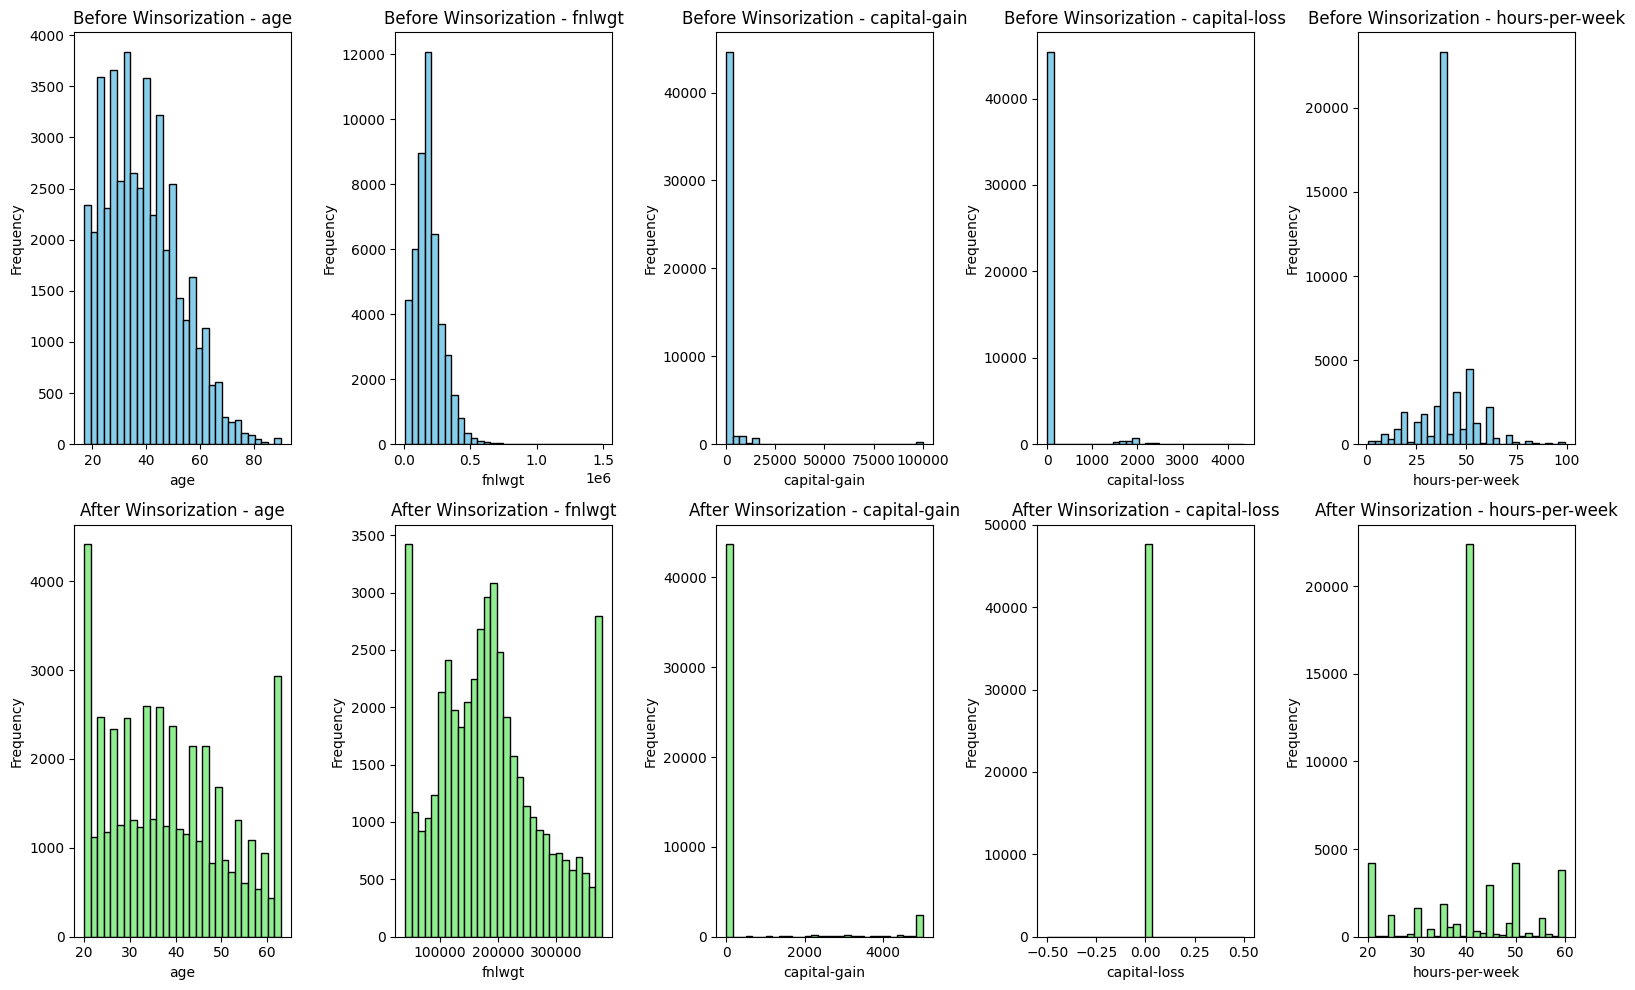

In [40]:
import matplotlib.pyplot as plt

# Define a function to plot histograms for each numerical column
def plot_histograms_before_after(df_before,df_after, num_columns):
    plt.figure(figsize=(16, 10))
    
    # Plot histograms before winsorization
    for i, col in enumerate(num_columns, start=1):
        plt.subplot(2, len(num_columns), i)
        plt.hist(df_before[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Before Winsorization - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    # Plot histograms after winsorization
    for i, col in enumerate(num_columns, start=len(num_columns) + 1):
        plt.subplot(2, len(num_columns), i)
        plt.hist(df_after[col], bins=30, color='lightgreen', edgecolor='black')
        plt.title(f'After Winsorization - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot histograms before and after winsorization
plot_histograms_before_after(df,df_winsorized, num_columns)


In [41]:
df_winsorized.to_csv("Data\outlier.csv")

ENCODING

In [42]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("Data\outlier.csv")
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,20,United-States,<=50K
2,2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
# Remove the "Unnamed" column
df.drop(columns="Unnamed: 0", inplace=True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,20,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [44]:
# Get the categorical columns
cat_columns = df.select_dtypes(include=["object"]).columns.tolist()
cat_columns


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [45]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encode the categorical columns
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])
    # Print the classes for each categorical column
    print(pd.DataFrame({col: label_encoder.classes_, 'label': label_encoder.transform(label_encoder.classes_)}))
    print()

          workclass  label
0       Federal-gov      0
1         Local-gov      1
2      Never-worked      2
3           Private      3
4      Self-emp-inc      4
5  Self-emp-not-inc      5
6         State-gov      6
7       Without-pay      7

       education  label
0           10th      0
1           11th      1
2           12th      2
3        1st-4th      3
4        5th-6th      4
5        7th-8th      5
6            9th      6
7     Assoc-acdm      7
8      Assoc-voc      8
9      Bachelors      9
10     Doctorate     10
11       HS-grad     11
12       Masters     12
13     Preschool     13
14   Prof-school     14
15  Some-college     15

          marital-status  label
0               Divorced      0
1      Married-AF-spouse      1
2     Married-civ-spouse      2
3  Married-spouse-absent      3
4          Never-married      4
5              Separated      5
6                Widowed      6

           occupation  label
0        Adm-clerical      0
1        Armed-Forces      1
2  

In [46]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,2,3,0,4,1,0,0,20,38,0
2,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,2,9,5,2,0,0,0,40,4,0


In [47]:
# Save the encoded DataFrame to a new CSV file
df.to_csv("Data/label_encoded_dataset.csv", index=False)